In [1]:
# imports: 
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(0);

## Note: Fill in at places marked with "To-do"

---

### Setting up and training a neural network

In [2]:
# Load training data and convert to torch.tensor
x_train = torch.tensor(np.load('data/x_train_exercise.npy'))
y_train = torch.tensor(np.load('data/y_train_exercise.npy'))
                  
# Load test data
x_test = torch.tensor(np.load('data/x_test_exercise.npy'))
y_test = torch.tensor(np.load('data/y_test_exercise.npy'))

In [3]:
# Check shape of x_train: Number of samples x Features dimension
x_train.shape

torch.Size([400, 3])

In [4]:
# Check shape of x_train: Number of samples x Labels dimension
y_train.shape

torch.Size([400, 4])

#### There are many activation functions other than ReLU (torch.nn.ReLU()). One such activation is hyperbolic tangent: $\text{Tanh}(\cdot)$. Pytorch provides $\text{Tanh}()$ as torch.nn.Tanh(). Here's how $\text{Tanh}()$ looks like:
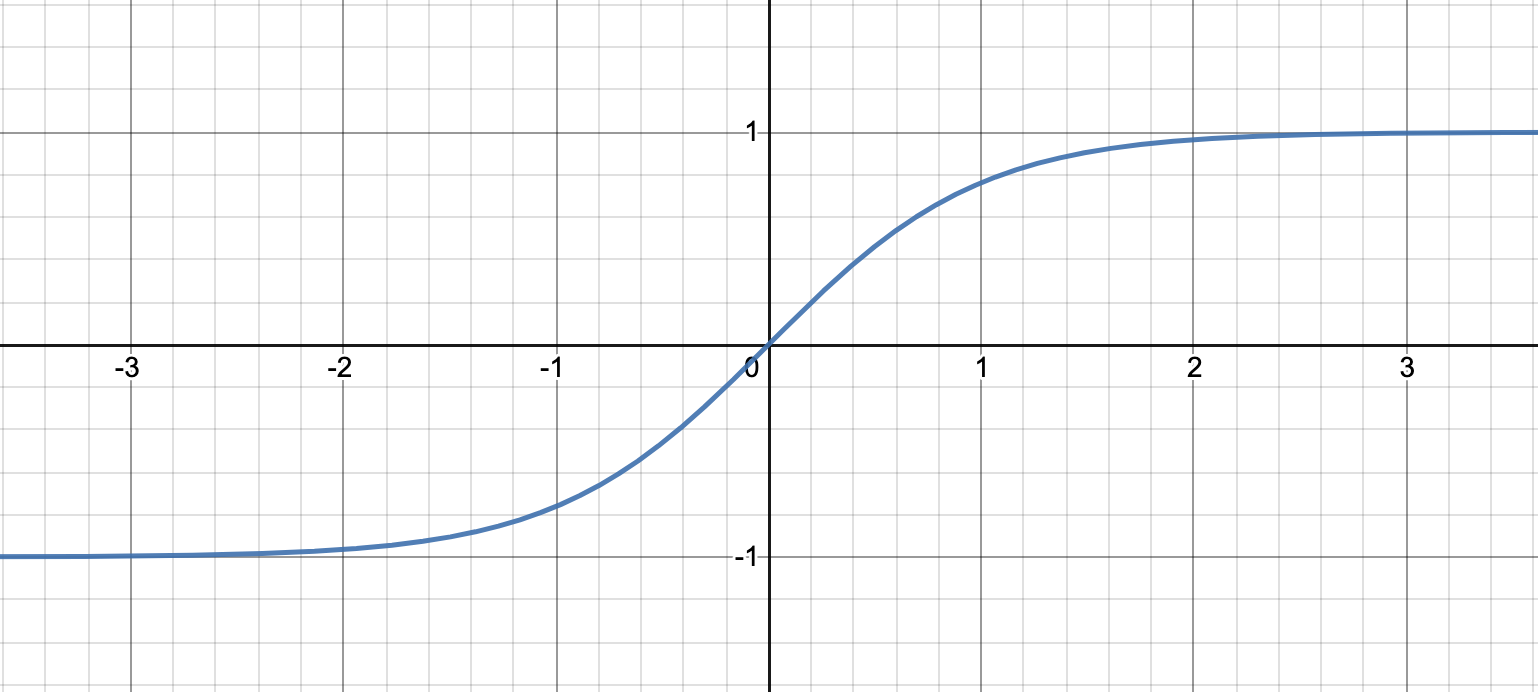

In [5]:
# Create a NN model with hidden layers of size [10,20,8] and tanh() activation functions. 
# Similar to torch.nn.ReLU(), torch.nn.Tanh() is avaialble to use directly.

# Recall: NN is repeated linear and nonlinear transformations
# The first and last layer dimensions are determined by feature and label dimensions

nn = torch.nn.Sequential(
    torch.nn.Linear(3,10),
    torch.nn.Tanh(),
    torch.nn.Linear(10,20),
    torch.nn.Tanh(),
    torch.nn.Linear(20,8),
    torch.nn.Tanh(),
    torch.nn.Linear(8,4)
)

#----------------------------------------------
print('Neural network:\n\n',nn)

Neural network:

 Sequential(
  (0): Linear(in_features=3, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=8, bias=True)
  (5): Tanh()
  (6): Linear(in_features=8, out_features=4, bias=True)
)


### Train a NN model:

In [6]:
# Define an empty list to store loss history
train_loss_history = []
test_loss_history = []

# Learning rate
lr = 0.01

# Optimizer: use Adam
optimizer = torch.optim.Adam(nn.parameters(), lr=lr)

# Loss function: use the MEAN SQUARED ERROR (MSE) as loss
loss_function = torch.nn.MSELoss()

# number of steps, the proper term is 'EPOCH'
num_epochs = 1000

# begin iterating over epochs
for epoch in range(num_epochs):
    
    # Make your predictions, USE TRAINING DATA ONLY!!
    y_train_pred = nn(x_train)
    
    # Compute the loss. 
    train_loss = loss_function(y_train_pred, y_train)
    
    
    # store the loss in a list
    train_loss_history.append(train_loss.detach().item())
    
    
    # Call .backward() on loss to compute gradient (d_loss/d_a)
    train_loss.backward()
    
            
    # Update the model paramaeters
    # No need for torch.no_grad() anymore with in-built optimizers
    optimizer.step()
    
    # remove any pre-exisitng gradients stored
    optimizer.zero_grad()
    
    # We also track the loss on test data but don't use that information for training (just for monitoring purpose)
    with torch.no_grad(): #torch.no_grad() is back because we don't train on test data and so don't need gradients
        
        # Make your predictions
        y_test_pred = nn(x_test)
        
        # Compute the loss.
        test_loss = loss_function(y_test_pred, y_test)
        
        
        # store the loss in a list
        test_loss_history.append(test_loss.detach().item())

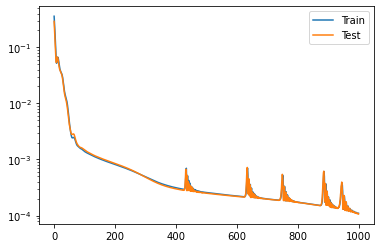

In [7]:
# Plot loss history
plt.plot(train_loss_history)
plt.plot(test_loss_history)
plt.yscale('log')
plt.legend(['Train','Test'])

### Evaluating prediction accuracy:

***Note: Evaluate on test data not used during training***

In [8]:
def calculate_R2(true, pred):
    # Note: both true and pred should be numpy 1D-array, NOT torch tensors
    true_mean = true.mean()
    ss_tot = ((true-true_mean)**2).sum()
    ss_res = ((true-pred)**2).sum()
    return 1. - (ss_res/ss_tot)


def plotR2(true, pred):
    dim = true.shape[1]
    fig = plt.figure(figsize=plt.figaspect(1./dim))
    def helper(ax,index):
        R2 = calculate_R2(true[:,index].squeeze().numpy(), pred[:,index].squeeze().detach().numpy())
        R2 = np.round(R2,2)
        ax.scatter(true[:,index], pred[:,index].detach())
        ax.plot([0,true[:,index].max()],[0,true[:,index].max()],c='red')
        ax.set_title('Label dim: {},  R2={}'.format(index,R2))
        ax.set_xlabel('True'); ax.set_ylabel('Predicted')
    for i in range(dim):
        ax = fig.add_subplot(1, dim, i+1); helper(ax,i)
    fig.tight_layout()

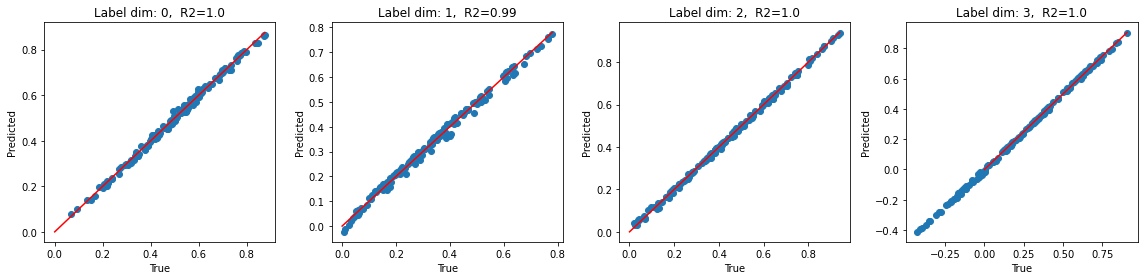

In [9]:
# Make prediction on test set
y_test_pred = nn(x_test)

# Visualize accuracy
plotR2(y_test, y_test_pred)

### Go back to where you created the NN. Try the following:
---

- Changing activation functions 
    - see list on Wikipedia here: https://en.wikipedia.org/wiki/Activation_function
    - see list on PyTorch here: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
    
    
---

- Changing width of layers and number of layers (hence, increasing/decreasing model complexity). Do you see signs of underfitting/overfitting?

---

**Warning: When changing hte NN architecture, make sure the dimensions are correct to avoid errors.**